# 0. Introduction

We are going to use the data that we have been provided to study and try to predict the evolution of Dengue disease in the cities of **San Jose**, *Puerto Rico*, and **Iquitos**, *Peru*. More information in this [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/).

To begin our study, this notebook will be part of our baseline, where various algorithms with simple optimization will be used, with the aim of beginning to know how we could create robust models.


# 1. Libraries

Before starting any analysis we must ensure that the basic and general use libraries *(numpy, pandas, etc.)* are correctly imported. 

In [1]:
# Preprocessing
from sklearn import preprocessing

# Loading the data
import pandas as pd
import io
from google.colab import files

# Graphics display
import seaborn as sns
import matplotlib.pyplot as plt

# Estimator and model selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Others
import numpy as np    
from sklearn.metrics import mean_absolute_error 

# 2. Loading the data

The first step is to upload all the CSV files that have been provided to us and that thanks to them we will obtain the data with which we are going to work. To do this, we will use the tools that Google Colab offers us when uploading files.

## Preprocessing the data

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, etc.

In [2]:
# Make function to preprocess data
def preprocess_data(data_path, labels_path=None):
    # Load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path)
    # Fill missing values
    df.fillna(df.mean(), inplace=True)
    lb = preprocessing.LabelBinarizer()

    if labels_path:
        labels = pd.read_csv(labels_path)
        
        labels['city'] = lb.fit_transform(labels['city'])
    
    df['city'] =  lb.fit_transform(df['city'])

    selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']
    df = df[selected_features]

    if labels_path:
        return df, labels
    return df

We execute the newly compiled method, which will allow us to load and preprocess our data.

In [3]:
df_features, df_labels  = preprocess_data('dengue_features_train.csv', labels_path="dengue_labels_train.csv")

Finally, we also load the file with which we will carry out the final prediction, once our model is trained.

In [4]:
df_test_final = preprocess_data("dengue_features_test.csv")

# 3. Detaching the dataset

To train the models that we make, it is necessary to separate our training dataset into two parts, one precisely to train the model, and another to check if our models are good.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels['total_cases'], test_size=0.2, random_state=1)

# 4. Execution of the algorithm

We will use the *GradientBoostingRegressor*, which will build a set of decision trees sequentially. In each iteration, each model will try to correct errors made in the previous iteration by optimizing a loss function.

In [6]:
def Boosting(X_train, X_test):
    # Model Parametrization 
    regressor = GradientBoostingRegressor(n_estimators= 100, max_depth = 5, criterion='mae', random_state=0)
    # Model construction
    regressor.fit(X_train, y_train)

    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    print ("Error Measure ",  mae, "\n")

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("GradientBoosting Regressor")
    plt.show()
    
    return regressor

We run the algorithm

Error Measure  18.30589278572303 



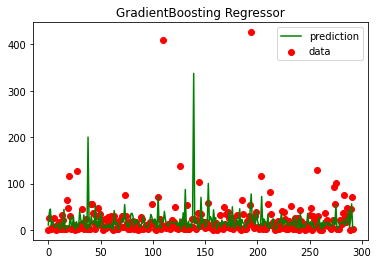

In [7]:
model = Boosting(X_train, X_test)

## Submission result

Now, we are going to test our model with the data provided to us in the dengue_features_test.csv file to predict dengue cases for the weeks proposed in said file.

In [ ]:
final_model_prediction = model.predict(df_test_final)

# Round the result and cast to int
y = np.rint(final_model_prediction)
y = y.astype(int)
res = np.hstack(y)

res

array([  7,  15,  32,  19,  10,  57,  10,  35,  17,  14,  13,  28,  24,
        19,  50,  64,  21,  31,  51,  38,  86,  24,   8, 115,  17,  14,
        34,  41,  21,  40,  11,  17,  14,   9,  15,   9,  15,  15,  15,
        11,  15,  15,  10,  13,  15,   9,  13,  11,  13,   6,  15,  15,
        10,  12,  86,  11,  41,  13,  14,  26,  95, 114,  37,  70,  41,
        38,  82,  24,  25,  45,  39,  41,  26,  28,  64,  40,  58,  24,
        31,  19,  12,  27,  17,  39,   8,  26,  12,   9,   8,  13,  40,
        11,  17,  11,  48,  10,  13,  14,  10,  10,  23,  13,  11,  21,
        20,  12,  11,  24,  49,  64,  36,  22,  29,  34,  59,  82,  34,
        36,  36, 183,  83, 156,  36,  38, 200,  31,  52,  50, 192,  30,
        16,  11,  19,  10,  14,  14,  23,  10,  15,  14,  19,  15,  20,
        13,  14,  15,  15,  15,  13,  17,  14,   6,  13,   6,  15,  15,
        12,  49,  10,  18,  10,  22,  22,  18,  19,  51,  32,  60,  18,
        67,  77,   9,  56,  51,  29,  23,  59,  26,  70,  26,  2

Finally, we are going to download a CSV file that contains our prediction, to load it into DrivenData and return the score of our model.


In [ ]:
submission = pd.read_csv("submission_format.csv", index_col=[0, 1, 2])

submission.total_cases = final_model_prediction.astype(np.int64)
submission.to_csv("result.csv")

**And the result is:**

*29.5433
Woo! I scored 29.5433 on 'DengAI: Predicting Disease Spread'!*